In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_curve, auc,
                             classification_report)

# Nice plots
plt.rcParams["figure.figsize"] = (8, 5)



In [68]:
# 1) Load your CSV
df = pd.read_csv("data.csv")

# 2) Drop useless columns if present
for col in ["id", "Unnamed: 32"]:
    if col in df.columns:
        df = df.drop(columns=[col])

# 3) Map diagnosis: M=1 (malignant), B=0 (benign)
if "diagnosis" in df.columns:
    df["target"] = df["diagnosis"].map({"M": 1, "B": 0})
    df = df.drop(columns=["diagnosis"])  # keep a single target column

# 4) Basic checks
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nNull counts:\n", df.isnull().sum())

# 5) Handle any remaining missing values (median for numeric)
df = df.fillna(df.median(numeric_only=True))

df.head()


Shape: (569, 31)
Columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'target']

Null counts:
 radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                   

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


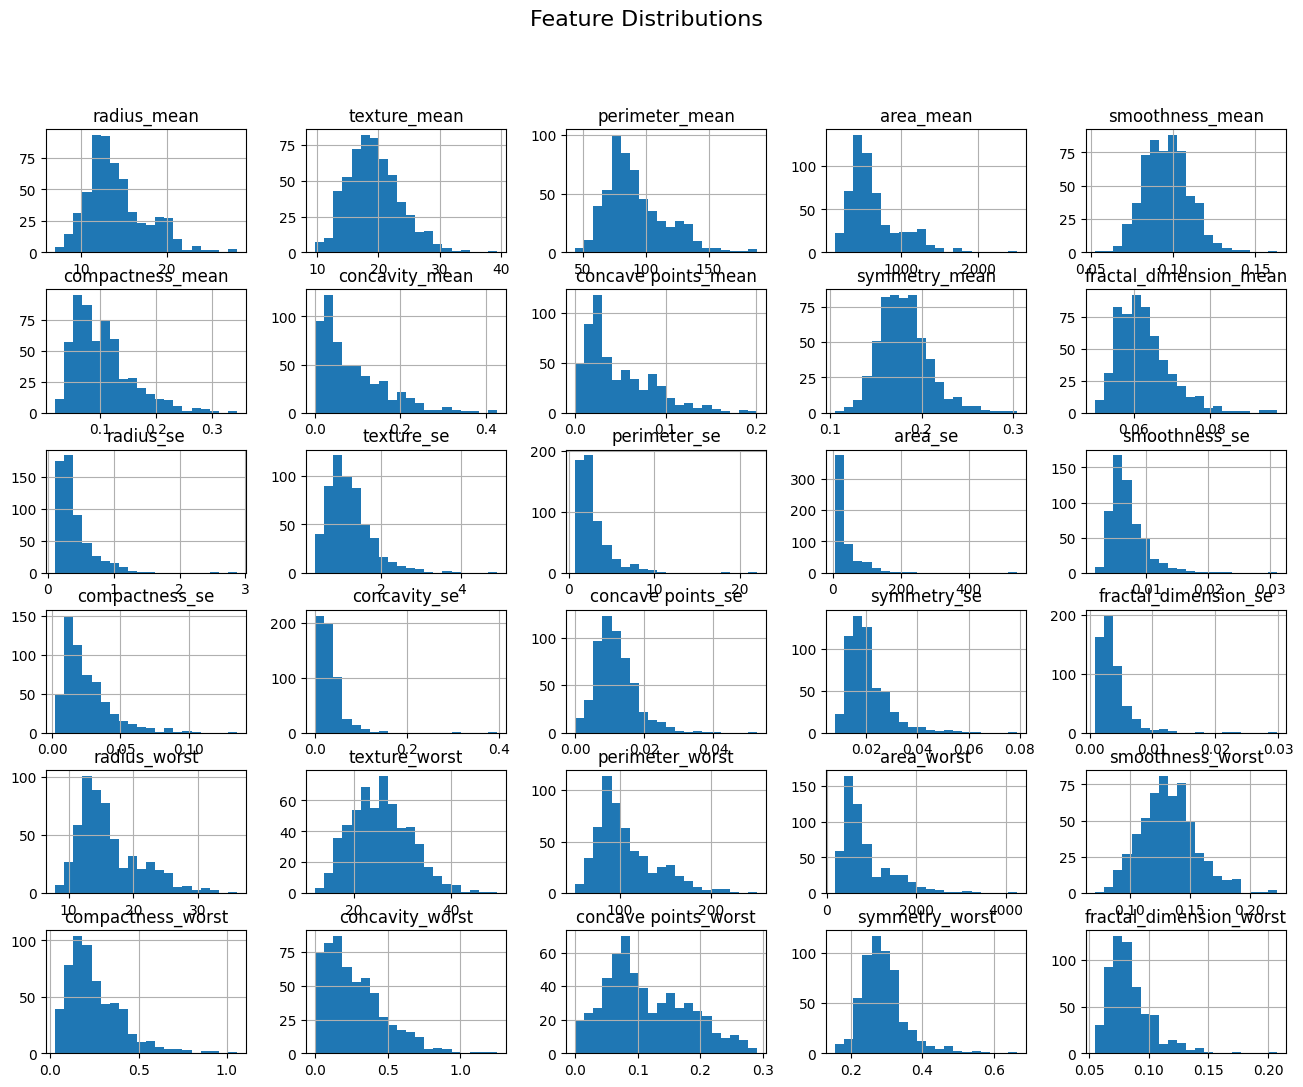

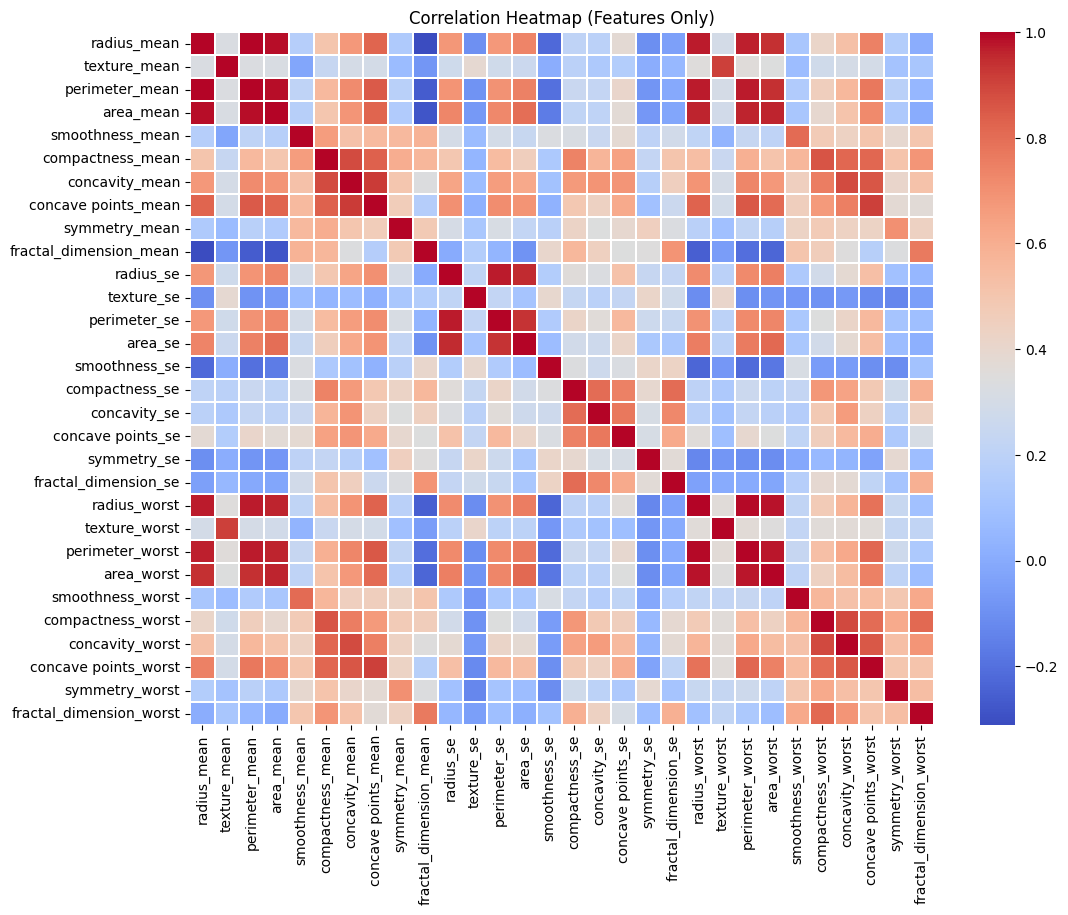

In [69]:
# Histograms of all numeric features
df.drop(columns=["target"]).hist(figsize=(16, 12), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Correlation heatmap (exclude target so it’s easier to read)
corr = df.drop(columns=["target"]).corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, cmap="coolwarm", linewidths=0.1)
plt.title("Correlation Heatmap (Features Only)")
plt.show()




In [70]:
# Features & label
X = df.drop(columns=["target"])
y = df["target"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Train size:", X_train.shape, " Test size:", X_test.shape)



Train size: (455, 30)  Test size: (114, 30)


Logistic Regression
-------------------
Accuracy : 0.9737
Precision: 0.9756
Recall   : 0.9524
F1-score : 0.9639

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



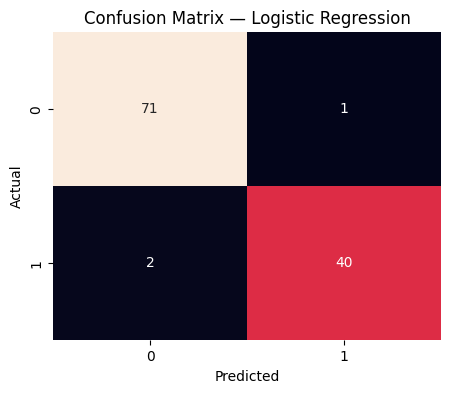

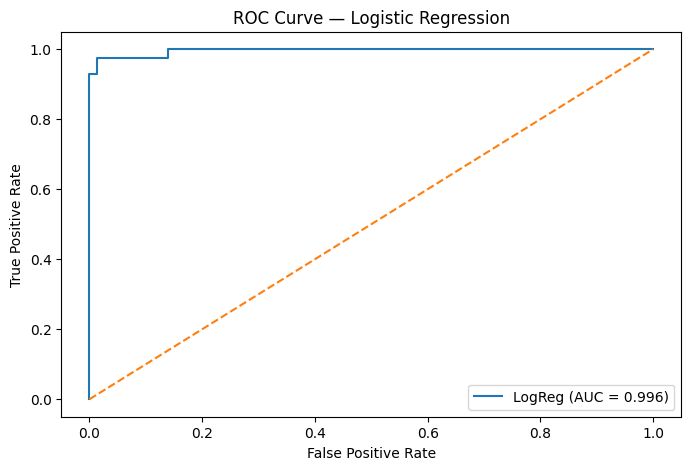

In [71]:
# Train
log_clf = LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)
log_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_log = log_clf.predict(X_test_scaled)
y_prob_log = log_clf.predict_proba(X_test_scaled)[:, 1]

# Metrics
log_acc  = accuracy_score(y_test, y_pred_log)
log_prec = precision_score(y_test, y_pred_log)
log_rec  = recall_score(y_test, y_pred_log)
log_f1   = f1_score(y_test, y_pred_log)

print("Logistic Regression")
print("-------------------")
print(f"Accuracy : {log_acc:.4f}")
print(f"Precision: {log_prec:.4f}")
print(f"Recall   : {log_rec:.4f}")
print(f"F1-score : {log_f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.plot(fpr_log, tpr_log, label=f"LogReg (AUC = {auc_log:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.show()



Random Forest
-------------
Accuracy : 0.9649
Precision: 1.0000
Recall   : 0.9048
F1-score : 0.9500

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



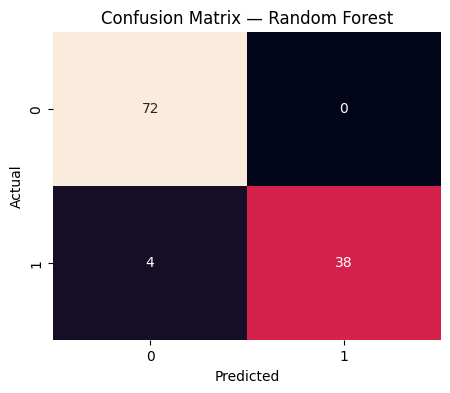

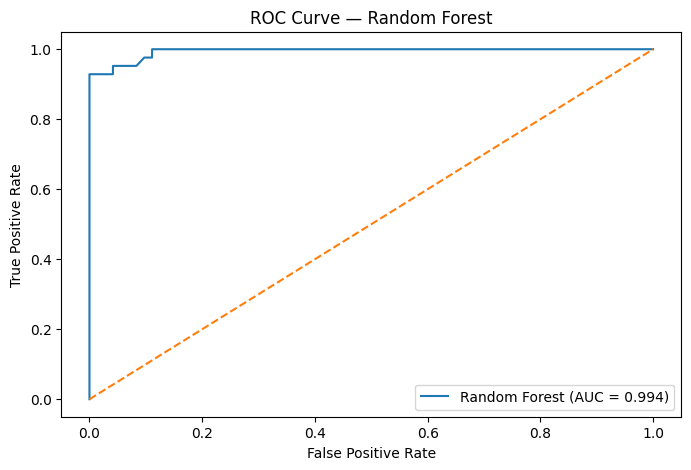

In [72]:
# Train
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)   # RF doesn’t need scaling; using raw features

# Predict
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Metrics
rf_acc  = accuracy_score(y_test, y_pred_rf)
rf_prec = precision_score(y_test, y_pred_rf)
rf_rec  = recall_score(y_test, y_pred_rf)
rf_f1   = f1_score(y_test, y_pred_rf)

print("Random Forest")
print("-------------")
print(f"Accuracy : {rf_acc:.4f}")
print(f"Precision: {rf_prec:.4f}")
print(f"Recall   : {rf_rec:.4f}")
print(f"F1-score : {rf_f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest")
plt.legend()
plt.show()


Final Comparison:



,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.973684,0.97561,0.952381,0.963855
1,Random Forest,0.964912,1.00000,0.904762,0.950000


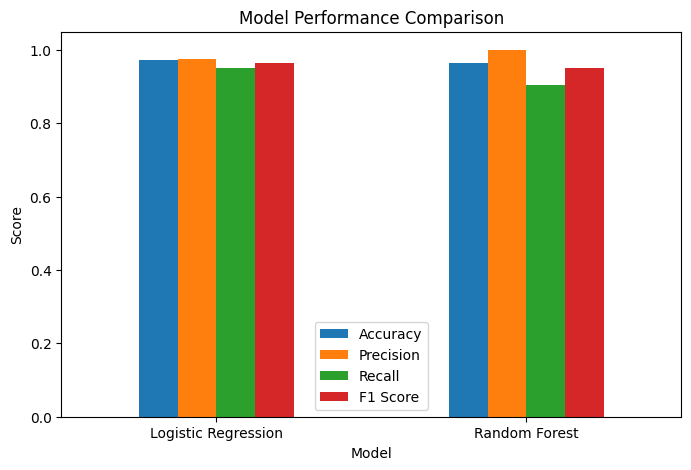

In [73]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [log_acc, rf_acc],
    "Precision": [log_prec, rf_prec],
    "Recall": [log_rec, rf_rec],
    "F1 Score": [log_f1, rf_f1]
})

print("Final Comparison:\n")
display(comparison)

# Bar chart
ax = comparison.set_index("Model").plot(kind="bar", figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.show()
